In [20]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import scipy
from scipy import optimize

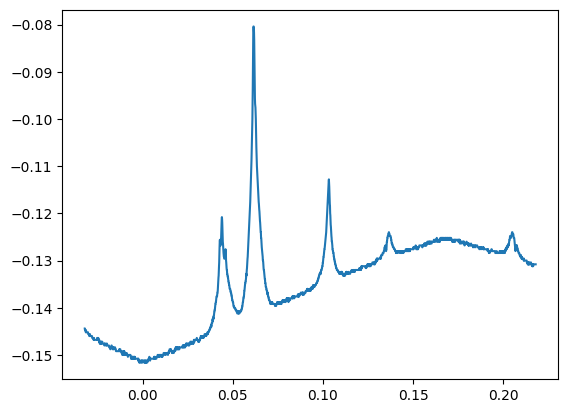

In [21]:
data1 = pandas.read_csv('Data1.csv')
time = np.array(data1["Time"])
ch1 = np.array(data1["Ch1"])
ch2 = np.array(data1["Ch2"])
ch3 = np.array(data1["Ch3"])

plt.plot(time, ch3)

In [22]:
def FindMichelsonCalibration(data, ch1, start, end):
    fringeCount = 0
    epsilon = .001*(max(ch2)- min(ch2))
    for i in data[start:end]:
        if(i < data[start]+epsilon and i > data[start]-epsilon):
            fringeCount += 1
    return (max(ch1)- min(ch1))/(fringeCount/2)

mc = FindMichelsonCalibration(ch2, ch1, np.where(ch1 == min(ch1))[0][0], np.where(ch1 == max(ch1))[0][0])

c = scipy.constants.c
f = c/780e-9
L1 = 233e-3
L2 = 46e-3
const = f**2/c/2/(L1-L2)*mc
V1 = ch1[np.where(ch3 == max(ch3))[0][0]]
V2 = ch1[np.where((ch3 <= -.11) & (ch3 >= -.12))[0][0]]

print(const*(V2- V1))

-1.5810337520699505e+18


In [ ]:
def findPeaks():
    